In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
revision:
Clustring: on the basis of distance cluster is made (najakai ko distance ko aadhar ma banaunxa cluster)
steps:
1. choose the center of the cluster randomly center kati ota vanda= no of clusters 

2.calculate the distance between the centers and each datapoints 
- after calculating each cluster set now to find the new center of each cluster 
-taking the average of each cluster 
-after updating the center of the cluster repeat the same step 2 . 

  3. untill and unless the two  consecutive calculated cluster have same center and have same data point lies
inside that  cluster repeat this process 
-if two consecutive calculated cluster have same center then the actual cluster is formed 


In [9]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

In [10]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
df=df.rename(columns={
    'Annual Income (k$)':'annual_income',
    'Spending Score (1-100)':'spend_score'
})
    

In [13]:
df.head()

,CustomerID,Gender,Age,annual_income,spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
X=df[['annual_income','spend_score']]
X.head()

,annual_income,spend_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
model fit garna lai hami lai no of customer chyinxa 
- distance based ho so we need scaling 

In [16]:
# Scaling 
scaler=StandardScaler()
xscaled=scaler.fit_transform(X)

In [17]:
xscaled   # this changes in the numpy array for the easy evaluation we need to convert it to dataframe 

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [18]:
xscaled=pd.DataFrame(xscaled,columns=X.columns)  # for the convinience we convert the numpy array to the dataframe 
xscaled.head()

,annual_income,spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [ ]:
# now we fit the Kmeans clustering

In [19]:
km=KMeans(n_clusters= 4)  # kati ota group banaune ta is given by n_clusters=4 (4 ota vayo)
km.fit(xscaled)

KMeans(n_clusters=4)

In [23]:
labels=km.labels_     # kun data kun cluster ma paryo ta 

In [24]:
km.cluster_centers_   # calculated centers for the kMeans clustering 

array([[-0.47298347, -0.26414036],
       [ 1.00919971, -1.22553537],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275]])

In [27]:
centers=pd.DataFrame(km.cluster_centers_ ,columns=['P1','P2']) # nothing just make the center as dataframe
centers.head()
                     

,P1,P2
0,-0.472983,-0.264140
1,1.009200,-1.225535
2,-1.329545,1.132178
3,0.991583,1.239503


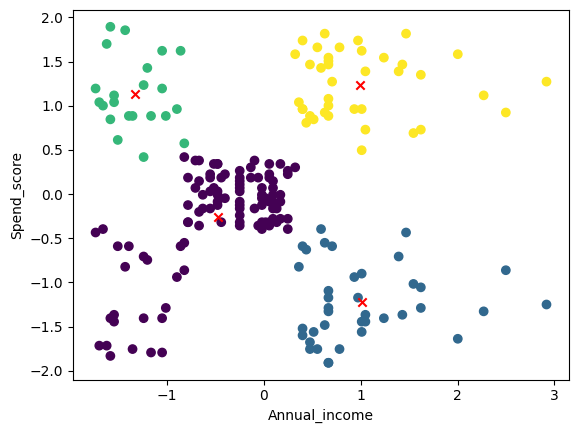

In [28]:

plt.scatter(xscaled.annual_income,xscaled.spend_score,c=labels)
plt.scatter(centers.P1,centers.P2,color='red',marker='x')
plt.xlabel("Annual_income")
plt.ylabel("Spend_score")
           
plt.show()

In [ ]:
# intrepretation


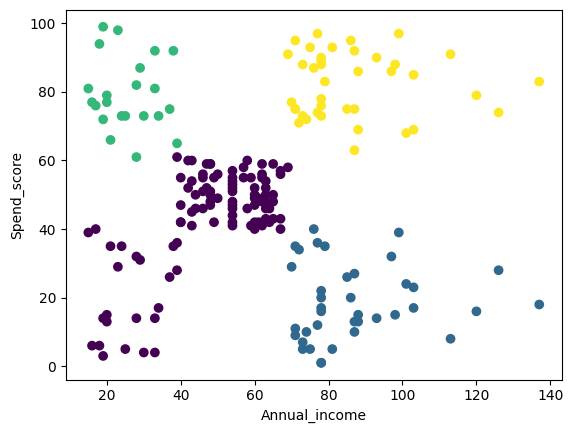

In [25]:
# visulalization

plt.scatter(X.annual_income,X.spend_score,c=labels)
plt.xlabel("Annual_income")
plt.ylabel("Spend_score")
           
plt.show()

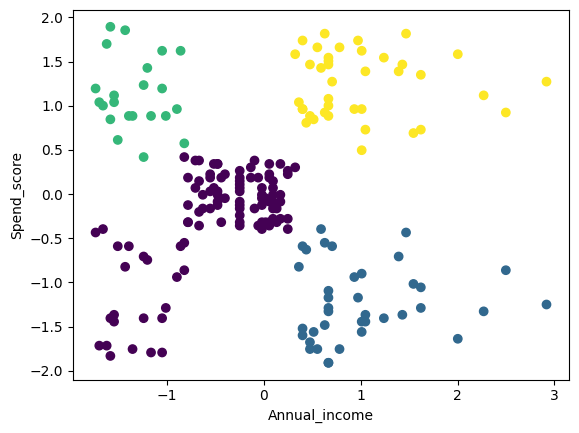

In [26]:
 # visulaiization after scaling 
plt.scatter(xscaled.annual_income,xscaled.spend_score,c=labels)
plt.xlabel("Annual_income")
plt.ylabel("Spend_score")
           
plt.show()

In [29]:
km.inertia_   # is also called the WCSS

109.22822707921344

In [ ]:
# how to find the optiaml number of custer ?
-inertia 
-WCSS(within cluster sum of squares)
=> if the WCSS distance is small then it is better model rather than the distance greater 


  k=1,k=2,k=3,k=4,k=5,k=6 

In [31]:
wcss=[]
for k in range (1,11):
    kmodel=KMeans(n_clusters=k)
    kmodel.fit(xscaled)

    inertia=kmodel.inertia_
    wcss.append(inertia)
    

In [32]:
wcss

[400.0,
 273.6688866264201,
 157.70400815035947,
 108.92131661364355,
 65.56840815571681,
 55.103778121150576,
 44.91118554999014,
 41.59509477090325,
 42.03851071441671,
 29.067387506702932]

In [ ]:
#Elbow method => used to select the optimal no of cluster in the Kmeans  

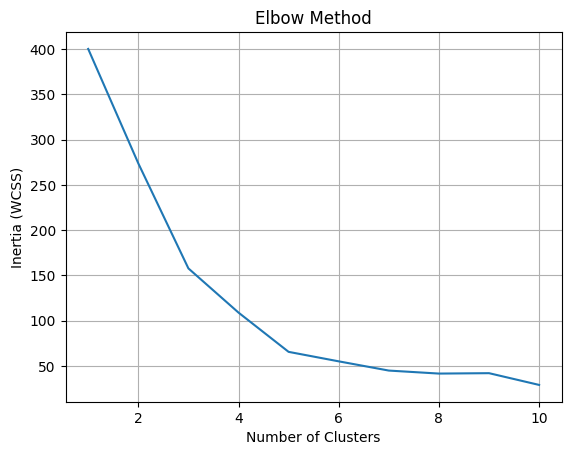

In [38]:
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.grid(True)         # Add grid BEFORE showing the plot
plt.show()


In [ ]:
# elblow method says that when we see the sharp turn we need to consider that point 
=> elbow method ma small amount of difference ley wcss ko value gatirako kun point dekhi xa ta teslai consider garne 
=> jun thau ma angle kamm xa teslai sharp turn vaninxa
=> see the above graph at what point we see the most sharp point 

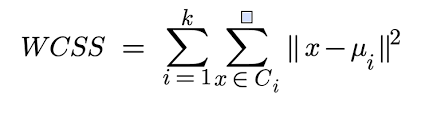

In [ ]:
copy image garne  